***Test to correlate graph metric with failure***

In [2]:
# Linear - Line of best fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv'
df=pd.read_csv(url)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.lmplot(x='mpg', y='disp', data=df)
plt.title("Scatter Plot with Linear fit");

NameError: name 'sns' is not defined

In [ ]:
# Scatter Plot with lowess line fit

plt.title("Scatter Plot with Lowess fit");

In [ ]:
import seaborn as sns
url = 'https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv'
df=pd.read_csv(url)
#x1 = np.random.randn(100)
#y1 = np.random.randn(100)

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.jointplot(x='mpg', y='disp', data=df);

# Point byserial 

https://towardsdatascience.com/point-biserial-correlation-with-python-f7cd591bd3b1

We can initially relate some node metric with point-biserial

In [14]:
import pandas as pd
from scipy.stats import pointbiserialr

# get data
df_nodes = pd.read_csv('asfailres.csv', sep=';')

df_nodes.head(20)


,Id,state,simfailed,Degree,Weighted Degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,Authority,Hub,modularity_class,pageranks,componentnumber,clustering,triangles,eigencentrality
0,4969,Recovered,0,5,5,6,0.315238,0.335062,796.382134,0.017926,0.017926,6,0.001917,0,0.100000,1,0.058677
1,2548,Recovered,0,21,21,5,0.404913,0.443020,2745.559256,0.129725,0.129726,0,0.005764,0,0.300000,63,0.430063
2,10656,Failed,23,1,1,7,0.246503,0.256313,0.000000,0.000597,0.000597,5,0.000856,0,0.000000,0,0.002702
3,1335,Recovered,0,2,2,6,0.293678,0.309263,81.417149,0.008015,0.008015,10,0.000898,0,0.000000,0,0.025818
4,1455,Failed,1,1,1,7,0.218283,0.226377,0.000000,0.000214,0.000214,1,0.000639,0,0.000000,0,0.001743
5,1334,Recovered,0,2,2,6,0.298481,0.313731,37.588565,0.008117,0.008117,10,0.000847,0,0.000000,0,0.026429
6,1453,Recovered,0,1,1,7,0.268947,0.281167,0.000000,0.003505,0.003504,1,0.000566,0,0.000000,0,0.011557
7,10771,Recovered,0,2,2,6,0.320980,0.341455,94.780643,0.013092,0.013092,2,0.000904,0,0.000000,0,0.044096
8,3999,Recovered,0,1,1,7,0.262320,0.274401,0.000000,0.001652,0.001652,9,0.000561,0,0.000000,0,0.006463
9,3758,Recovered,0,2,2,6,0.263538,0.277071,1.033333,0.002328,0.002328,5,0.000811,0,0.000000,0,0.009098


In [15]:
# get continuous and dichotomous data


df_nodes['state'] = df_nodes['state'].map({
    'Recovered': 1,
    'Failed': 0
})
#df_nodes.set_index('Id', drop=True, inplace=True)
grades = df_nodes['Eccentricity']
question_1 = df_nodes['state']
# pbc of first question
pbc = pointbiserialr(question_1, grades)
print(pbc)

PointbiserialrResult(correlation=-0.5268849058565461, pvalue=6.474232136638939e-38)


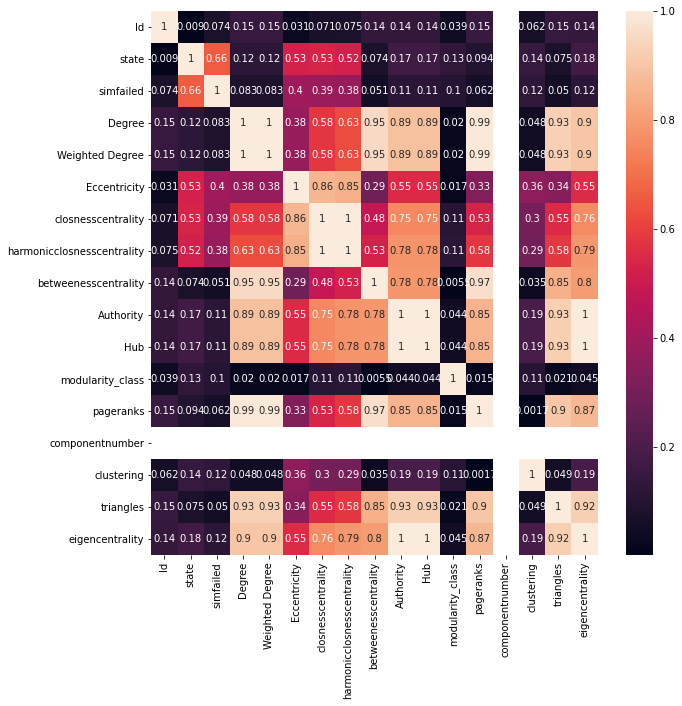

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(np.abs(df_nodes.corr()), annot=True)
plt.show()

In [17]:
data['state'].value_counts()

Recovered    461
Failed        51
Name: state, dtype: int64

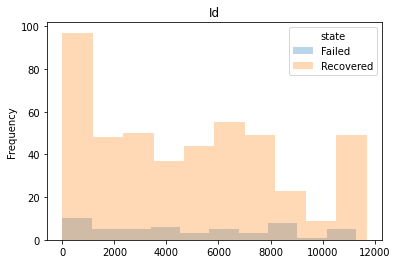

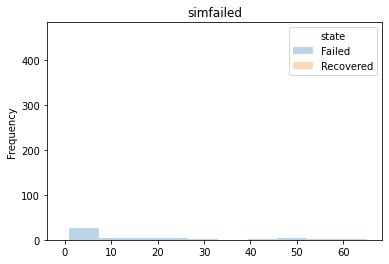

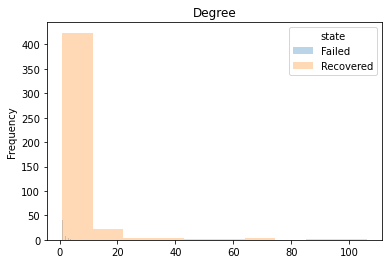

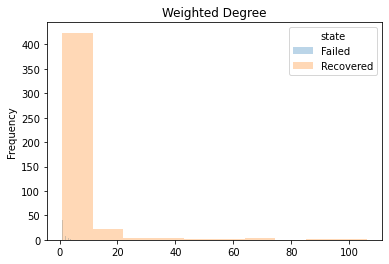

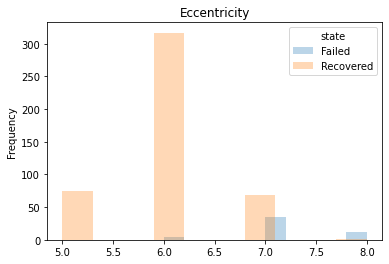

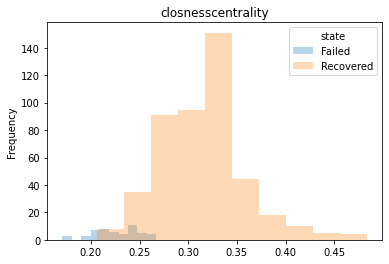

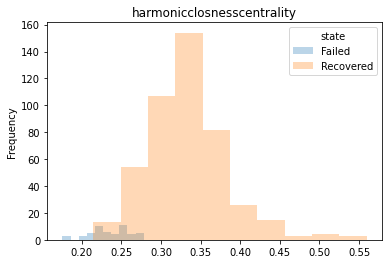

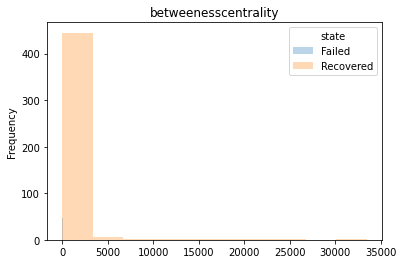

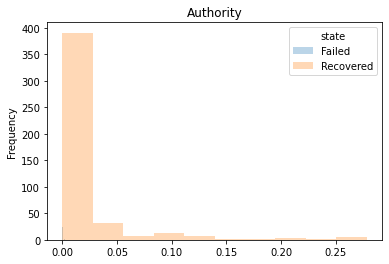

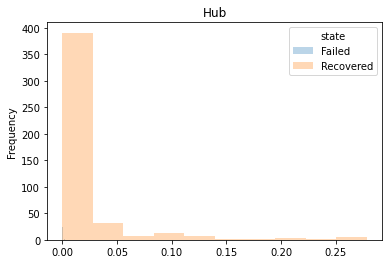

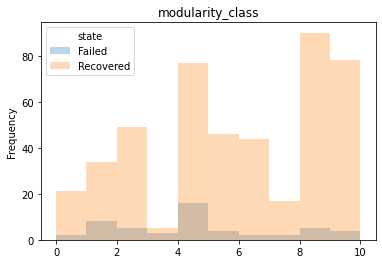

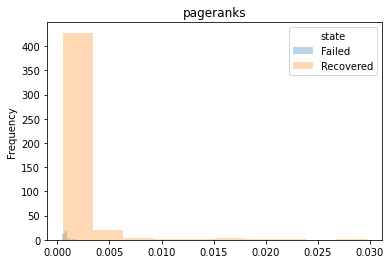

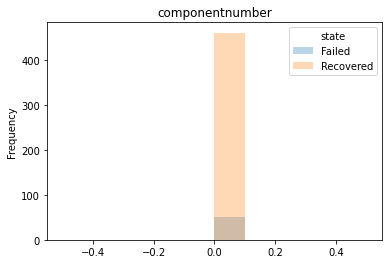

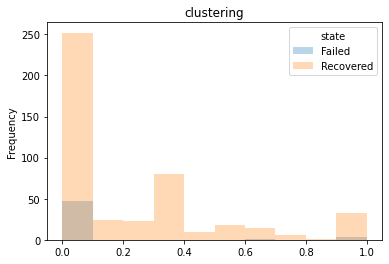

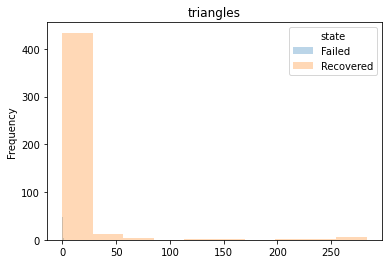

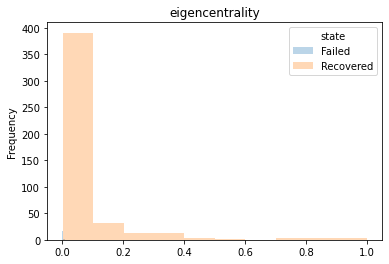

In [18]:
for col in data.columns:
    try:
        data.groupby('state')[col].plot(kind='hist', title=col, alpha=0.3)
        plt.legend(loc='best', title='state')
        plt.show()
    except:
        continue